### EDA of IT Salary Across Europe, A beginner's attempt :)

In [2]:
#First we import our tools of trade

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [3]:
#Then we import file

df_20 = pd.read_csv('C:\Windows\System32\EDA Beginner Projects\IT Salary\IT Salary Survey EU 2020.csv', sep = ',')
df_20.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [4]:
df_20.shape

(1253, 23)

In [5]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [6]:
mean_age_20 = df_20['Age'].mean()
mean_age_20

32.50978792822186

In [7]:
df_20.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [8]:
df_20.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [9]:
max_salary_20_index = df_20['Yearly brutto salary (without bonus and stocks) in EUR'].idxmax()
max_salary_20_index

473

In [10]:
print(df_20.iloc[473])

Timestamp                                                                                                                  25/11/2020 03:27:34
Age                                                                                                                                        NaN
Gender                                                                                                                                     NaN
City                                                                                                                                    Berlin
Position                                                                                                                                   NaN
Total years of experience                                                                                                                  NaN
Years of experience in Germany                                                                                                             NaN

In [11]:
df1_20 = df_20.drop([473])
df1_20.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.252000e+03,8.850000e+02,373.000000
mean,32.509788,4.709587e+05,6.322459e+05,12.967828
std,5.663804,1.412885e+07,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.860000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,5.000000e+08,5.000000e+08,40.000000


In [12]:
max_salary_index2 = df1_20['Yearly brutto salary (without bonus and stocks) in EUR'].idxmax()
max_salary_index2

853

In [13]:
df1_20.iloc[853]

Timestamp                                                                                                                  27/11/2020 15:26:10
Age                                                                                                                                       27.0
Gender                                                                                                                                  Female
City                                                                                                                                    Berlin
Position                                                                                                                     Backend Developer
Total years of experience                                                                                                                    1
Years of experience in Germany                                                                                                               1

In [15]:
df1_20.iloc[852]

Timestamp                                                                                                                  27/11/2020 14:55:13
Age                                                                                                                                       29.0
Gender                                                                                                                                  Female
City                                                                                                                                   Cologne
Position                                                                                                                           ML Engineer
Total years of experience                                                                                                                    1
Years of experience in Germany                                                                                                               1

In [16]:
q1 = df_20['Yearly brutto salary (without bonus and stocks) in EUR'].quantile(0.25)
q3 = df_20['Yearly brutto salary (without bonus and stocks) in EUR'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df_20.loc[(df_20['Yearly brutto salary (without bonus and stocks) in EUR'] < lower_bound)| (df_20['Yearly brutto salary (without bonus and stocks) in EUR']> upper_bound)]
outliers.index

Int64Index([   2,   35,  107,  131,  141,  152,  186,  192,  193,  272,  279,
             280,  318,  333,  366,  378,  382,  391,  392,  393,  436,  441,
             445,  473,  491,  494,  511,  528,  529,  543,  558,  559,  573,
             574,  576,  601,  630,  641,  680,  683,  691,  706,  712,  727,
             750,  751,  770,  778,  804,  833,  837,  838,  853,  855,  865,
             883,  924,  943,  947,  958,  959,  960,  966,  967,  971,  982,
             993, 1008, 1046, 1051, 1052, 1085, 1135, 1142, 1155, 1209, 1223,
            1234, 1235, 1242],
           dtype='int64')

In [17]:
df1_20 = df_20.drop([2,   35,  107,  131,  141,  152,  186,  192,  193,  272,  279,
             280,  318,  333,  366,  378,  382,  391,  392,  393,  436,  441,
             445,  473,  491,  494,  511,  528,  529,  543,  558,  559,  573,
             574,  576,  601,  630,  641,  680,  683,  691,  706,  712,  727,
             750,  751,  770,  778,  804,  833,  837,  838,  853,  855,  865,
             883,  924,  943,  947,  958,  959,  960,  966,  967,  971,  982,
             993, 1008, 1046, 1051, 1052, 1085, 1135, 1142, 1155, 1209, 1223,
            1234, 1235, 1242])
df1_20.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1148.000000,1173.000000,833.000000,349.000000
mean,32.575784,69016.847511,65611.074430,13.409742
std,5.652569,15864.104213,28670.322745,15.333262
min,21.000000,27000.000000,12000.000000,0.000000
25%,29.000000,60000.000000,55000.000000,0.000000
50%,32.000000,69000.000000,65000.000000,0.000000
75%,35.000000,80000.000000,75000.000000,30.000000
max,69.000000,111111.000000,760000.000000,40.000000


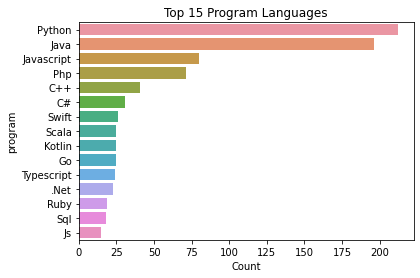

In [24]:
program = df_20['Your main technology / programming language'].str.title().str.strip().value_counts().iloc[:15].reset_index()
program = program.rename(columns={"index": "program", 'Your main technology / programming language': "Count"})
sns.barplot(data = program, y="program", x="Count")
plt.title('Top 15 Program Languages')
plt.show()


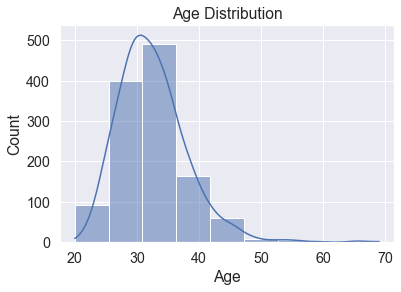

Age Descriptive Statistics


count    1226.0
mean       33.0
std         6.0
min        20.0
25%        29.0
50%        32.0
75%        35.0
max        69.0
Name: Age, dtype: float64

In [25]:
sns.set(font_scale=1.3)
plot=sns.histplot(df_20.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

print('Age Descriptive Statistics')
df_20['Age'].describe().round()